In [17]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')
datapath=('/content/drive/MyDrive/dataset/amazon_cells_labelled.txt')

Mounted at /content/drive


In [18]:

import pandas as pd


In [19]:
data=pd.read_csv(datapath,sep='\t',header=None)
data.columns=['sentence','label']
data.to_csv("amazon_cells_labelled.csv",index=False)
print(data.head())

                                            sentence  label
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1
2                             Great for the jawbone.      1
3  Tied to charger for conversations lasting more...      0
4                                  The mic is great.      1


In [20]:
import numpy as np
import seaborn as sns


In [21]:
data['label'].value_counts()

,count
label,
0,500
1,500


In [22]:
x=data['sentence']
y=data['label']

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression



In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

vt = TfidfVectorizer(
    stop_words='english',
    max_features=5000,
    ngram_range=(1,3),
    sublinear_tf=True,
    min_df=2
)
x_train_vt = vt.fit_transform(x_train)
x_test_vt = vt.transform(x_test)

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(x_train_vt, y_train)



LogisticRegression(class_weight='balanced', max_iter=1000)

In [26]:
from sklearn.metrics import confusion_matrix
y_pr=model.predict_proba(x_test_vt)[:,1]

for t in [0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.66,0.7]:
  y_pred__new=(y_pr>=t).astype(int)
  print(f"th:{t}")
  print(confusion_matrix(y_test,y_pred__new))


th:0.3
[[ 27  66]
 [  1 106]]
th:0.35
[[ 41  52]
 [  4 103]]
th:0.4
[[56 37]
 [ 8 99]]
th:0.45
[[66 27]
 [19 88]]
th:0.5
[[74 19]
 [22 85]]
th:0.55
[[81 12]
 [30 77]]
th:0.6
[[84  9]
 [41 66]]
th:0.66
[[88  5]
 [48 59]]
th:0.7
[[90  3]
 [59 48]]


In [27]:
y_prob = model.predict_proba(x_test_vt)[:, 1]
threshold = 0.4
y_pred = (y_prob >= threshold).astype(int)

# y_prob = model.predict_proba(x_test_vt)[:, 1]

# # Try stricter thresholds
# for t in [0.5, 0.55, 0.6, 0.65, 0.7]:
#     y_pred_new = (y_prob >= t).astype(int)
#     print(f"Threshold: {t}")
#     print(confusion_matrix(y_test, y_pred_new))


In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score,precision_score,f1_score
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

In [29]:
print("recall:",recall)
print("precision:",precision)
print("f1:",f1)

recall: 0.9252336448598131
precision: 0.7279411764705882
f1: 0.8148148148148148


In [30]:
import numpy as np

unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(0): np.int64(407), np.int64(1): np.int64(393)}


In [31]:
y_prob = model.predict_proba(x_test_vt)[:, 1]
print(y_prob[:20])  # see probability of class 1


[0.59620803 0.57762612 0.70524896 0.23026687 0.67749357 0.72058668
 0.26109234 0.65972574 0.1664513  0.86160378 0.88890793 0.32278424
 0.42635878 0.53898053 0.61524563 0.35346055 0.8334412  0.32278424
 0.55303941 0.73707503]


In [32]:
new_comments = [
    "the battery power i love",
    "I love this article, very helpful!",
    "This item is very poor",
    "the cover is attractive",
    "product is affordable for the people"
]

new_comments_vt = vt.transform(new_comments)
new_prob = model.predict_proba(new_comments_vt)[:, 1]
new_pred = (new_prob >= threshold).astype(int)

for comment, pred in zip(new_comments, new_pred):
    print(f"Comment: {comment}\nPredicted Label: {pred}\n")

Comment: the battery power i love
Predicted Label: 1

Comment: I love this article, very helpful!
Predicted Label: 1

Comment: This item is very poor
Predicted Label: 0

Comment: the cover is attractive
Predicted Label: 0

Comment: product is affordable for the people
Predicted Label: 1



[[56 37]
 [ 8 99]]


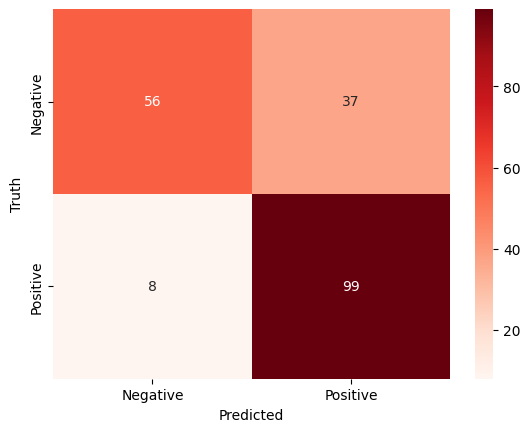

In [33]:

cm=confusion_matrix(y_test,y_pred)
print(cm)
import seaborn as sns
sns.heatmap(cm,annot=True,cmap='Reds')
plt.xlabel('Predicted')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.ylabel('Truth')
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])
plt.show()